# What is regression ?

Mathematically speaking, according to Wikipedia:
>In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the outcome or response variable, or a label in machine learning parlance) and one or more error-free independent variables (often called regressors, predictors, covariates, explanatory variables or features).

In machine learning regression refers to a supervised learning technique where the goal is to predict a continuous numerical value based on one or more independent features.

# What is linear regression ?

Mathematically speaking, according to Wikipedia:
>In statistics, linear regression is a model that estimates the relationship between a scalar response (dependent variable) and one or more explanatory variables (regressor or independent variable) using linear predictor functions whose unknown model parameters are estimated from the data.

In machine learning linear regression is a specific type of regression model that predicts the output as a linear function of the input features.

More specifically, in linear regression, given an input features vector $x=\begin{pmatrix} x_{0}=1 & x_{1} & x_{2} & ... & x_{n} \end{pmatrix}$, and a vector of weights $\theta=\begin{pmatrix} \theta_{0} & \theta_{1} & \theta_{2} & ... & \theta_{n} \end{pmatrix}$ the model predicts the output according to the following hypothesis function:


$$
h_\theta(x) = \theta_{0}\underbrace{x_{0}}_{=1} + \theta_{1}x_{1} + \theta_{2}x_{2} + ... + \theta_{n}x_{n}
$$

$$
h_\theta(x) = \theta^{T}x
$$
  
<br><br>
$\theta_{0}$ is called the bias of the model. It allows the model to shift the regression line predicted up or down so it can better fit the data. 

Without it, the output for $x=\begin{pmatrix} 0 & 0 & ... & 0 \end{pmatrix}$ would always be 0.


# Simple example: simple linear regression

To get a better understanding of simple linear regression (one input feature, one output value), we will use a simple dataset found on Kaggle (https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression/data). This dataset is called "Salary Dataset" and contains entries with two columns: years of experience and salary. It provides of examples the salaries of various employees according to their experience (measured in years).

### Setup

In [52]:
# Install dependencies as needed:
%pip install kagglehub
%pip install matplotlib
%pip install numpy
%pip install scikit-learn
%pip install scikit-surprise

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.1 MB 5.6 MB/s eta 0:00:02
   ------------- -------------------------- 3.7/11.1 MB 10.9 MB/s eta 0:00:01
   -------------------- ------------------- 5.8/11.1 MB 10.4 MB/s eta 0:00:01
   ----------------------------- ---------- 8.1/11.1 MB 10.5 MB/s eta 0:00:01
   ------------------------------------ --- 10.2/11.1 MB 10.6 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 10.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.2 MB ? eta -:--:--
   -- ------------------------------------- 2.1/41.2 MB 10.7 MB/s eta 0:00:04
   ---- ----------------------------------- 4.2/41.2 MB 10.1 MB/s eta 0:00:04
   ----- ----------------------------

In [3]:
#Import dependencies

import kagglehub
from kagglehub import KaggleDatasetAdapter
import matplotlib.pyplot as plt
import numpy as np

In [4]:
%matplotlib inline

### Load the dataset from Kaggle

In [5]:
# Set the path to the file you'd like to load
file_path = "Salary_dataset.csv"

# Load the latest version
salaries_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "abhishek14398/salary-dataset-simple-linear-regression",
  file_path
)

#Remove first column because it is useless
salaries_df = salaries_df.drop('Unnamed: 0', axis=1)

C:\Users\Arthur\AppData\Local\Temp\ipykernel_18352\2613686985.py:5: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  salaries_df = kagglehub.load_dataset(


### Observing the data

In [6]:
salaries_df.info()
print(salaries_df.describe())
print("First 5 records:", salaries_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.413333   76004.000000
std           2.837888   27414.429785
min           1.200000   37732.000000
25%           3.300000   56721.750000
50%           4.800000   65238.000000
75%           7.800000  100545.750000
max          10.600000  122392.000000
First 5 records:    YearsExperience   Salary
0              1.2  39344.0
1              1.4  46206.0
2              1.6  37732.0
3              2.1  43526.0
4              2.3  39892.0


Text(0, 0.5, 'Salary')

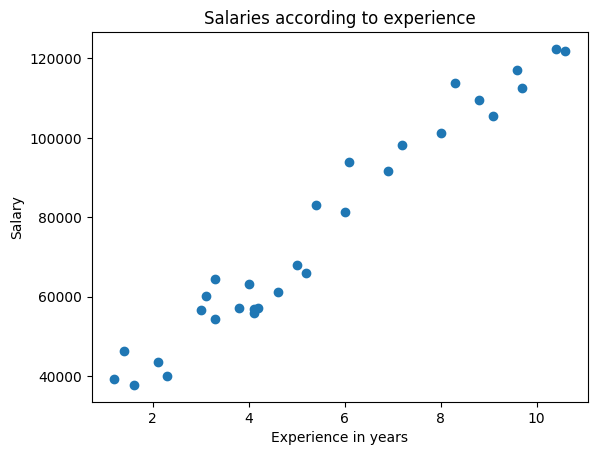

In [167]:
fig, ax = plt.subplots()
ax.plot(salaries_df['YearsExperience'], salaries_df['Salary'], 'o')

ax.set_title('Salaries according to experience')
ax.set_xlabel('Experience in years')
ax.set_ylabel('Salary')

### Interpreting the graph

As we can see, the points we plotted seem to form a straight line that cuts the y-axis approximately around 37000. This fact indicates that we could use a linear function of the input to predict the output. This is a typical use case of simple linear regression.

To get a better intuition of this, let's plot a straight line that could fit best our data (a straight line that passes close to most of our data points).

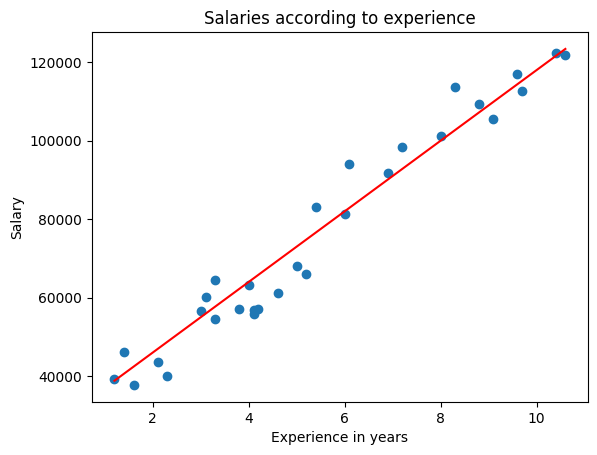

In [8]:
# Define the affine function: y = ax + b
a = 9000  # slope
b = 28000  # y-intercept

# Create x values (from -10 to 10)
x = salaries_df['YearsExperience']

# Calculate y values
y = a * x + b

# Plot
ax.plot(x, y, label=f'y = {a}x + {b}', color='red')
fig

As you can see, this straight line, defined as an affine function, can fit our data pretty good. This is the idea behind linear regression. We want to find the linear function of the input (in this case, a simple affine function) that best fits our data. Once we found it using training, we will be able to use this function as our hypothesis function to predict output for unseen data.

So when we use linear regression, we suppose that the label in our labeled data can be modeled as a linear function of the inputs.

Now let's talk about how we can train our model to find the hypothesis function that best fits our data.

As we saw earlier our hypothesis function is parameterized using parameters from the $\theta$ vector.
These parameters allow us to modify the hypothesis function and fit it to our data.

Before we can even think about fitting our model, we're gonna need a way to measure how good our hypothesis function fits the data. This is done using a loss function. A loss function measures how much our hypothesis function is wrong in its predictions compared to the actual data. For linear regression, the loss function is the Mean Squared Error (MSE) of the hypothesis function. For each training example, we will calculate the error of the model's prediction (the difference between the expected output and the prediction), we will square the error, and finally we will sum the squared errors and divide the result by the total number of training examples.

More formally, according to Wikipedia the MSE is defined as follow:
>In statistics, the mean squared error (MSE)
> or mean squared deviation (MSD) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the true value.

Given the vector of expected outputs $y$ as well as the vector of predicted values $\hat{y}$, the MSE will be computed according to the following formula:

$$
\mathcal{L}(\theta) = \frac{1}{m}\sum_{i=1}^{m} (y_{i}-\hat{y}_{i})^{2}
$$

where m is the number of training examples.

So when we express the predicted values as the result of the hypothesis function:

$$
\mathcal{L}(\theta) = \frac{1}{m}\sum_{i=1}^{m} (y_{i}-h_{\theta}(x^{(i)}))^{2}
$$

where $x^{(i)}$ is the i-th training example.

Why do we use the MSE as our loss function for linear regression?

1) it directly measures what we care about: minimizing MSE, we're trying to make predictions as close as possible to the actual data — which is the goal of regression

2) it makes the result positive so we avoid positive and negative errors canceling each other

3) the bigger the error, the heavier the impact it has on the loss function

4) it has nice mathematical properties:
    - it is differentiable everywhere (important for gradient descent)
    - it is convex in the case of linear regression, it has one global minimum so optimization is straightforward and reliable



Once we have our loss function, our goal will be to minimize the loss. To do that, we will use a method called gradient descent. 

Gradient Descent is an algorithm to find the minimum of a function.
You can think of it like:
> You're on a hilly surface (the loss function), and you want to go downhill to the lowest point (the minimum loss). Gradient descent tells you which direction is downhill and how far to go.

We start with some initial guess for the parameters (e.g., weights in linear regression), then iteratively update them using:

$$
\theta \leftarrow \theta - \eta \nabla_\theta \mathcal{L}(\theta)
$$

- $\theta$: current parameters (e.g. weights, bias)
- $\eta$: learning rate (step size)
- $\nabla_\theta \mathcal{L}(\theta)$: the gradient of the loss function with respect to $\theta$


Why does this work?

Because of a beautiful fact from calculus:

> The gradient of a function at a point points in the direction of steepest increase.  
> So the negative gradient points in the direction of steepest decrease — the fastest way downhill.

So at every step, gradient descent moves in the direction that most quickly reduces the loss.

Let's compute the gradient vector of our loss function. To do that we need to compute the partial derivative for each parameter $\theta_{i}$.

$$
\frac{\partial \mathcal{L}}{\partial \theta_{j}} = \frac{2}{m}\sum_{i=1}^{m} (y_{i}-h_{\theta}(x^{(i)}))x^{(i)}_{j} 
$$


That's it, now that we have all this theory sorted out, we can implement linear regression. All we have to do is start with some parameters, performs gradient descent using the formula for the gradient we have, and once we reach a point where the loss function barely changes we can decide to stop because we arrived close enought to the global minimum.

Let's implement that!

### Vectorization

$$
\underbrace{\hat{y}}_{m \times 1} = \underbrace{X}_{m \times n}\cdot\underbrace{\theta}_{n \times 1}
$$

In [120]:
def compute_loss_and_gradient(X, theta, y):
    m = X.shape[0]
    n = X.shape[1]
    print("theta", theta)
    y_predicted = X @ theta
    errors = y_predicted - y
    loss = (1/(2*m))*(errors.T@errors)
    print("loss", loss)
    gradient = (1/m)*(X.T@errors)
    print("gradient", gradient)
    return loss, gradient

In [169]:
def train(X, y, learning_rate=0.1, max_epochs=10, convergence_threshold=0.1):
    theta = np.random.uniform(0, 50000, size=n)
    last_loss = None
    loss_values = []
    for i in range(max_epochs):
        print("epoch", i)
        current_loss, gradient = compute_loss_and_gradient(X, theta, y)
        loss_values.append(current_loss)
        if(last_loss and abs(last_loss-current_loss) < convergence_threshold):
            print("Training converged!")
            break
        last_loss = current_loss
        theta = theta - learning_rate*gradient

    return theta, loss_values

As you can see when you read our training function, we initialize our weights $\theta$ randomly within a certain range (since we have an idea of the order of magnitude that theta should have according to our graph).
This allows us to see how our training behaves from different starting points.
Another option is to start from a fixed theta. This is definitely valid and can be simpler as well as faster.

In [158]:
#Create the input features matrix and add the x0 column on the left
X = salaries_df.iloc[:, :-1] 
X.insert(loc=0, column='x0', value=np.ones(m))
print("X", X)

y = salaries_df.iloc[:, -1]
print("y", y)

X      x0  YearsExperience
0   1.0              1.2
1   1.0              1.4
2   1.0              1.6
3   1.0              2.1
4   1.0              2.3
5   1.0              3.0
6   1.0              3.1
7   1.0              3.3
8   1.0              3.3
9   1.0              3.8
10  1.0              4.0
11  1.0              4.1
12  1.0              4.1
13  1.0              4.2
14  1.0              4.6
15  1.0              5.0
16  1.0              5.2
17  1.0              5.4
18  1.0              6.0
19  1.0              6.1
20  1.0              6.9
21  1.0              7.2
22  1.0              8.0
23  1.0              8.3
24  1.0              8.8
25  1.0              9.1
26  1.0              9.6
27  1.0              9.7
28  1.0             10.4
29  1.0             10.6
y 0      39344.0
1      46206.0
2      37732.0
3      43526.0
4      39892.0
5      56643.0
6      60151.0
7      54446.0
8      64446.0
9      57190.0
10     63219.0
11     55795.0
12     56958.0
13     57082.0
14     6111

In [147]:
theta_optimized, loss_values = train(X, y, 0.1, 100)
print("theta_optimized", theta_optimized)

epoch 0
theta [30958.75132459 28575.81614662]
loss 7450565335.609708
gradient x0                 109645.169398
YearsExperience    742443.597505
dtype: float64
epoch 1
theta x0                 19994.234385
YearsExperience   -45668.543604
dtype: float64
loss 57815337328.42953
gradient x0                -3.032288e+05
YearsExperience   -2.070585e+06
dtype: float64
epoch 2
theta x0                  50317.115884
YearsExperience    161389.935840
dtype: float64
loss 449405833628.75397
gradient x0                 8.479706e+05
YearsExperience    5.773224e+06
dtype: float64
epoch 3
theta x0                 -34479.947639
YearsExperience   -415932.467592
dtype: float64
loss 3494054032272.516
gradient x0                -2.362065e+06
YearsExperience   -1.609831e+07
dtype: float64
epoch 4
theta x0                 2.017266e+05
YearsExperience    1.193899e+06
dtype: float64
loss 27166441288514.758
gradient x0                 6.588695e+06
YearsExperience    4.488792e+07
dtype: float64
epoch 5
theta x0   

### Training curve

Let's plot our training curve. This curve shows the progression of the loss as the number of iterations of training increases.

Text(0, 0.5, 'Loss')

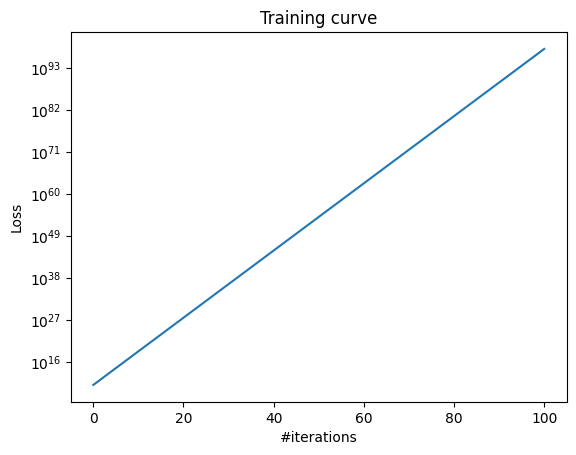

In [149]:
# Plotting the training curve
fig, ax = plt.subplots()
ax.semilogy(np.linspace(0, len(loss_values), len(loss_values)), loss_values)

ax.set_title('Training curve')
ax.set_xlabel('#iterations')
ax.set_ylabel('Loss')

As you can see here, our training doesn't converge toward the loss function minimum. On the contrary, the loss keeps increasing. This happens because the learning rate is too big. Even though the gradient points toward the correct direction (toward the steepest increase), if we substract it multiplied by a too big learning rate, then we could move too far and get to a bigger loss than before. This is exactly what happens to us here. We keep getting farther from the minimum because we move too far and the gradient keeps getting bigger.

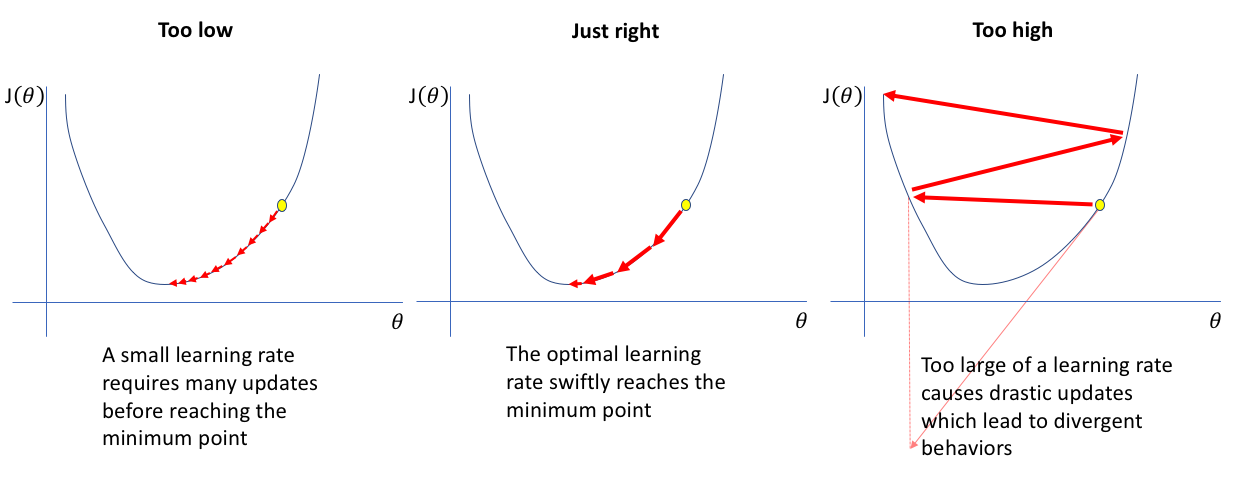

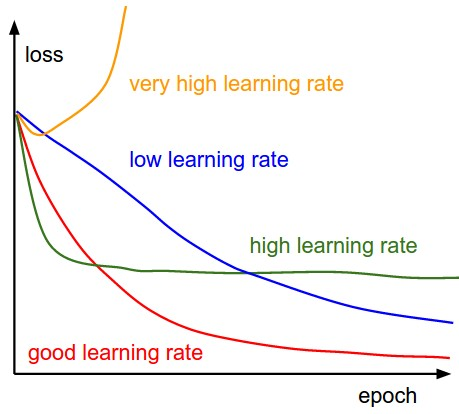

The solution in that case is to define a smaller learning rate. Currently the learning rate is 0.1. Let's divide our learning by 3 (LR=0.03) and see how it works.

In [150]:
theta_optimized, loss_values = train(X, y, 0.03, 100)
print("theta_optimized", theta_optimized)

epoch 0
theta [16299.36742718  4201.4271508 ]
loss 805919109.1485008
gradient x0                 -36960.906930
YearsExperience   -240942.372256
dtype: float64
epoch 1
theta x0                 17408.194635
YearsExperience    11429.698318
dtype: float64
loss 36261106.99242886
gradient x0                  3276.961532
YearsExperience    33151.837791
dtype: float64
epoch 2
theta x0                 17309.885789
YearsExperience    10435.143185
dtype: float64
loss 21845005.436862744
gradient x0                -2205.205771
YearsExperience   -4267.727635
dtype: float64
epoch 3
theta x0                 17376.041962
YearsExperience    10563.175014
dtype: float64
loss 21504739.20269742
gradient x0                -1445.970630
YearsExperience     839.012967
dtype: float64
epoch 4
theta x0                 17419.421081
YearsExperience    10538.004625
dtype: float64
loss 21427675.155012757
gradient x0                -1538.847217
YearsExperience     140.285649
dtype: float64
epoch 5
theta x0             

Text(0, 0.5, 'Loss')

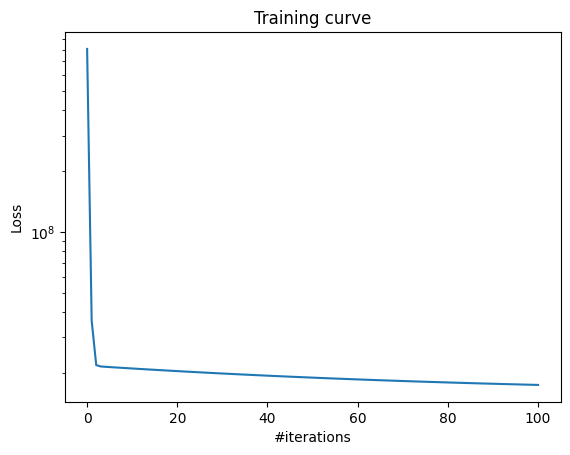

In [151]:
# Plotting the training curve
fig, ax = plt.subplots()
ax.semilogy(np.linspace(0, len(loss_values), len(loss_values)), loss_values)

ax.set_title('Training curve')
ax.set_xlabel('#iterations')
ax.set_ylabel('Loss')

This looks better. It seems like the loss is getting smaller and smaller. Let's now run for more epochs to see when we get convergence.

In [152]:
theta_optimized, loss_values = train(X, y, 0.03, 1500)
print("theta_optimized", theta_optimized)

epoch 0
theta [41047.8344706  17564.47474234]
loss 2079522900.099971
gradient x0                  60126.191076
YearsExperience    388655.855811
dtype: float64
epoch 1
theta x0                 39244.048738
YearsExperience     5904.799068
dtype: float64
loss 76055581.83423105
gradient x0                 -4795.305640
YearsExperience   -53558.235264
dtype: float64
epoch 2
theta x0                 39387.907908
YearsExperience     7511.546126
dtype: float64
loss 38448391.562283784
gradient x0                 4046.410936
YearsExperience    6813.699585
dtype: float64
epoch 3
theta x0                 39266.515579
YearsExperience     7307.135138
dtype: float64
loss 37480954.96116413
gradient x0                 2818.473795
YearsExperience   -1424.904805
dtype: float64
epoch 4
theta x0                 39181.961366
YearsExperience     7349.882283
dtype: float64
loss 37199626.00197849
gradient x0                 2965.324122
YearsExperience    -297.161871
dtype: float64
epoch 5
theta x0              

Text(0, 0.5, 'Loss')

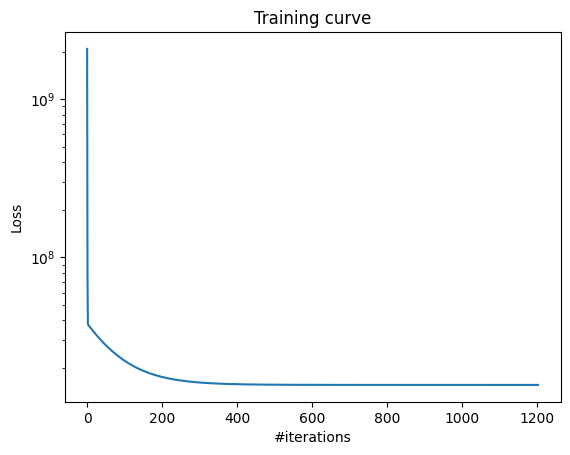

In [153]:
# Plotting the training curve
fig, ax = plt.subplots()
ax.semilogy(np.linspace(0, len(loss_values), len(loss_values)), loss_values)

ax.set_title('Training curve')
ax.set_xlabel('#iterations')
ax.set_ylabel('Loss')

After experimenting, I found that training always ends up converging when I run it with a LR of 0.03, with a maximum of 1500 epochs (for a variety of starting thetas). It usually converges around the 1200th epoch.

However, you can see we face a new kind of problem. Once we get closer to the minimum, the gradient gets small and so when we multiply it by the learning rate, we get very small steps and slow convergence.

Let's try if we could increase a little our learning rate to get faster convergence.

In [154]:
theta_optimized, loss_values = train(X, y, 0.05, 1000)
print("theta_optimized", theta_optimized)

epoch 0
theta [38098.96961354 47964.8822866 ]
loss 30375274429.785152
gradient x0                 2.217449e+05
YearsExperience    1.500224e+06
dtype: float64
epoch 1
theta x0                 27011.726327
YearsExperience   -27046.293527
dtype: float64
loss 24291600310.796413
gradient x0                -1.954029e+05
YearsExperience   -1.341910e+06
dtype: float64
epoch 2
theta x0                 36781.870125
YearsExperience    40049.203016
dtype: float64
loss 19427202879.42656
gradient x0                 1.775776e+05
YearsExperience    1.199506e+06
dtype: float64
epoch 3
theta x0                 27902.992336
YearsExperience   -19926.114518
dtype: float64
loss 15537713518.034273
gradient x0                -1.559677e+05
YearsExperience   -1.073003e+06
dtype: float64
epoch 4
theta x0                 35701.377715
YearsExperience    33724.011393
dtype: float64
loss 12427740283.223057
gradient x0                 142256.692721
YearsExperience    959060.144578
dtype: float64
epoch 5
theta x0     

Text(0, 0.5, 'Loss')

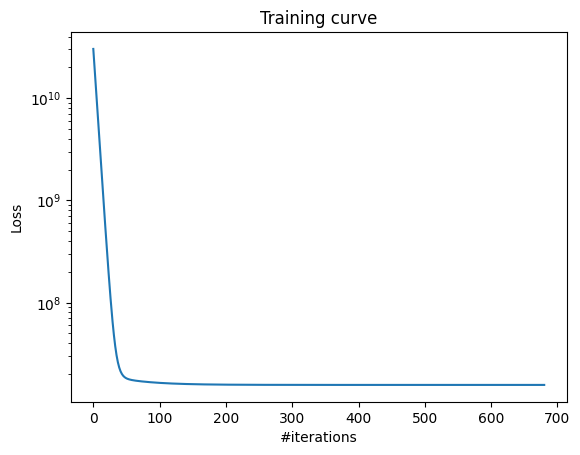

In [155]:
# Plotting the training curve
fig, ax = plt.subplots()
ax.semilogy(np.linspace(0, len(loss_values), len(loss_values)), loss_values)

ax.set_title('Training curve')
ax.set_xlabel('#iterations')
ax.set_ylabel('Loss')

After experimenting, I found that 0.05 is the best LR we can use to get convergence. If we use a bigger LR, training doesn't converge. If we use a smaller LR, we get slower convergence. 

### Normal Equation

Now, how could we be sure that we reach the correct global minimum? There are a few ways to check that. But I want to answer this question using another method called the Normal Equation.

The truth is that we don't have to use gradient descent to find the minimum of our loss function. Mathematicians have found an equation that allows us to find it's minimum. According to mathematics, to find the minimum of our loss function, we could just find the place where its gradient equals $\begin{pmatrix} 0 & x_{1} & 0 & ... & 0 \end{pmatrix}$.
Once we use this fact, we can find the equation to compute the optimal theta is:


$$
\boldsymbol{\theta} = \left(X^T X\right)^{-1} X^T y
$$

⚠️ Caution:
- $X^T X$ must be **invertible**. If it's **singular or nearly singular** (common with correlated features) its pseudoinverse instead.


In [118]:
theta_optimized = np.linalg.inv(X.T @ X) @ X.T @ y
print("theta_optimized", theta_optimized)

theta_optimized 0    24848.203967
1     9449.962321
dtype: float64


If you compare this true optimal theta to the one we reach with gradient descent, you'll see that they are very close.

# Linear regression using scikit-learn

We just implemented a very basic linear regression training. This was done for the sake of learning and understanding better linear regression. Now let's do it the right way, using the scikit-learn library. 

The scikit-learn python library allows coders to use machine learning algorithms such as regression, classification, or clustering in a simple, efficient and elegant way. It provides lots of utilities to train models conveniently.

Let's see how we can train our linear regression model using scikit-learn.

In [160]:
#Create the input features matrix
X = salaries_df.iloc[:, :-1]
y = salaries_df.iloc[:, -1]

In [166]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X, y)
print(reg.coef_)
print(reg.intercept_)

[9449.96232146]
24848.203966523208


As you see, we get very similar results using scikit-learn.
Let's see how our model fits to the data now that we trained it with scikit-learn.

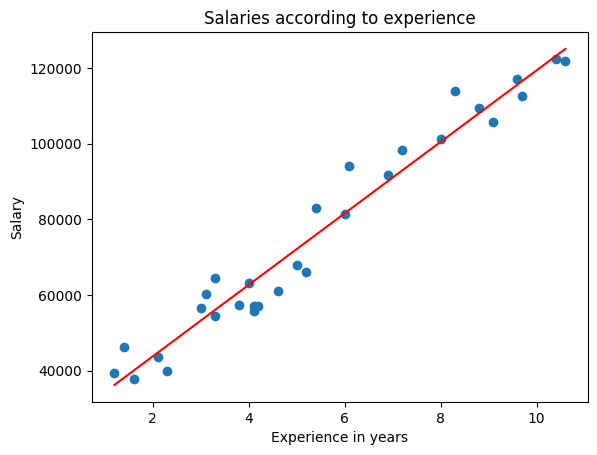

In [170]:
fig, ax = plt.subplots()
ax.plot(salaries_df['YearsExperience'], salaries_df['Salary'], 'o')

ax.set_title('Salaries according to experience')
ax.set_xlabel('Experience in years')
ax.set_ylabel('Salary')

x = salaries_df['YearsExperience']
y = reg.coef_ * x + reg.intercept_

ax.plot(x, y, label=f'y = {a}x + {b}', color='red')